# Preabmle

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')
import phase_calc_functions as phase_calc
import phase_plot_functions as phase_plot
import load_dataset as load
import subphase_calc_functions as subphase_calc
import miscellaneous as misc
import subphase_plot_functions_2 as subplot_2

# Functions

In [2]:
def calculate_percentile(data_split,data_full, q = 50):
    # Each month raw values
    output = data_split.groupby('time.month').reduce(np.nanpercentile, q = q, dim = 'time')
    # Climatology
    output_climatology = data_full.groupby('time.month').reduce(np.nanpercentile, q = q, dim = 'time')
    
    anom = output/output_climatology
    
    return anom, output

In [3]:
def calculate_percentile_raw_only(data_split,data_full, q = 50):
    # Each month raw values
    output = data_split.groupby('time.month').reduce(np.nanpercentile, q = q, dim = 'time')
    
    return output

# Variables Load and Calc

In [7]:
rmm = load.load_rmm()

In [8]:
nino34 = xr.open_dataset('../extreme_calc/nino34_daily_filled_month_average(00:00).nc')

## TCW

<div class="alert alert-block alert-info"> <font color = 'black' size = "+1"> TCW</font></div>

In [64]:
# This version of AWAP is just for the north, wet-season and for raindays
tcw = xr.open_dataset('/g/data/w40/ab2313/tcw/tcw_era5.nc')
tcw = misc.apply_masks(tcw)
tcw

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, time: 7250)
Coordinates:
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-30
Data variables:
    tcw      (time, lat, lon) float32 nan nan nan ... 21.650633 22.054811

In [65]:
tcw_split = subphase_calc.split_into_subphase(tcw, rmm)
tcw_split = subphase_calc.split_into_enso(tcw_split, nino34)
tcw_split

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, nino: 2, phase: 4, time: 7250)
Coordinates:
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-30
  * nino     (nino) object 'el nino' 'la nina'
Data variables:
    tcw      (nino, phase, time, lat, lon) float32 nan nan nan ... nan nan nan

In [66]:
q = 90
tcw_anom, tcw_raw = calculate_percentile(tcw_split,tcw, q = q)


In [57]:
del tcw
del tcw_split

In [56]:
tcw_anom

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, month: 6, nino: 2, phase: 4)
Coordinates:
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * nino     (nino) object 'el nino' 'la nina'
  * month    (month) int64 1 2 3 10 11 12
Data variables:
    tcw      (month, nino, phase, lat, lon) float64 nan nan nan ... 1.035 1.034

## Horizontal Wind

<div class="alert alert-block alert-info"> <font color = 'black' size = "+1"> U and V-wind</font></div>

In [32]:
uwind = xr.open_dataset('/g/data/w40/ab2313/ERA5/uwind_3.nc',chunks={"lat": 91, "lon": 180})

uwind_split = subphase_calc.split_into_subphase(uwind, rmm)
uwind_split = subphase_calc.split_into_enso(uwind_split, nino34)
uwind_split

<xarray.Dataset>
Dimensions:  (lat: 81, lon: 201, nino: 2, phase: 4, time: 7563)
Coordinates:
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -5.75 -5.5 -5.25 -5.0
  * lon      (lon) float32 110.0 110.25 110.5 110.75 ... 159.5 159.75 160.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-03-31
  * nino     (nino) object 'el nino' 'la nina'
Data variables:
    u        (nino, phase, time, lat, lon) float32 dask.array<chunksize=(1, 1, 7563, 81, 180), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-29 06:30:21 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [33]:
vwind = xr.open_dataset('/g/data/w40/ab2313/ERA5/vwind_2.nc',chunks={"lat": 91, "lon": 180})

vwind_split = subphase_calc.split_into_subphase(vwind, rmm)
vwind_split = subphase_calc.split_into_enso(vwind_split, nino34)
vwind_split

<xarray.Dataset>
Dimensions:  (lat: 81, lon: 201, nino: 2, phase: 4, time: 7563)
Coordinates:
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -5.75 -5.5 -5.25 -5.0
  * lon      (lon) float32 110.0 110.25 110.5 110.75 ... 159.5 159.75 160.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-03-31
  * nino     (nino) object 'el nino' 'la nina'
Data variables:
    v        (nino, phase, time, lat, lon) float32 dask.array<chunksize=(1, 1, 7563, 81, 180), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-29 05:20:23 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [34]:
q = 50
uwind_raw = calculate_percentile_raw_only(uwind_split,uwind, q = q)

del uwind
del uwind_split

In [35]:
q = 50
vwind_raw = calculate_percentile_raw_only(vwind_split,vwind, q = q)

del vwind
del vwind_split

## wwind

In [20]:
wwind = xr.open_dataset('/g/data/w40/ab2313/ERA5/wwind_2.nc',chunks={"lat": 91, "lon": 180}).sel(lon = slice(110,155))

wwind_split = subphase_calc.split_into_subphase(wwind, rmm)
wwind_split

<xarray.Dataset>
Dimensions:  (lat: 81, lon: 181, phase: 4, time: 7563)
Coordinates:
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -5.75 -5.5 -5.25 -5.0
  * lon      (lon) float32 110.0 110.25 110.5 110.75 ... 154.5 154.75 155.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-03-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    w        (phase, time, lat, lon) float32 dask.array<chunksize=(1, 7563, 81, 52), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-11 06:39:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [22]:
q = 50
wwind_anom, wwind_raw = calculate_percentile(wwind_split,wwind, q = q)

del wwind
del wwind_split

## cin

In [10]:
cin = xr.open_dataset('/g/data/w40/ab2313/ERA5/cin.nc',chunks={"lat": 91, "lon": 180}).sel(expver = 1)

cin_split = subphase_calc.split_into_subphase(cin, rmm)
cin_split

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 167, phase: 4, time: 7562)
Coordinates:
    expver   int32 1
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float32 112.0 112.25 112.5 112.75 ... 155.25 155.5 155.75
  * time     (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2020-03-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    cin      (phase, time, lat, lon) float32 dask.array<chunksize=(1, 7562, 60, 167), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-13 22:21:45 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [11]:
q = 50
cin_anom, cin_raw = calculate_percentile(cin_split,cin, q = q)

del cin
del cin_split

## cape

In [19]:
cape = xr.open_dataset('/g/data/w40/ab2313/ERA5/cape.nc',chunks={"lat": 91, "lon": 180})

cape_split = subphase_calc.split_into_subphase(cape, rmm)
cape_split

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 167, phase: 4, time: 7563)
Coordinates:
  * lon      (lon) float32 112.0 112.25 112.5 112.75 ... 155.25 155.5 155.75
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -10.5 -10.25 -10.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-03-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    cape     (phase, time, lat, lon) float32 dask.array<chunksize=(1, 7563, 60, 167), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-11 14:05:22 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [8]:
q = 50
cape_anom, cape_raw = calculate_percentile(cape_split,cape, q = q)

del cape
del cape_split

## olr (mtnlwrf)

In [80]:
mtnlwrf = xr.open_dataset('/g/data/w40/ab2313/ERA5/mtnlwrf.nc',chunks={"lat": 91, "lon": 180})

mtnlwrf_split = subphase_calc.split_into_subphase(mtnlwrf, rmm)
mtnlwrf_split

<xarray.Dataset>
Dimensions:  (expver: 2, lat: 60, lon: 167, phase: 4, time: 91)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-03-31
  * expver   (expver) int32 1 5
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float32 112.0 112.25 112.5 112.75 ... 155.25 155.5 155.75
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    mtnlwrf  (phase, time, expver, lat, lon) float32 dask.array<chunksize=(1, 91, 2, 60, 167), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-27 00:31:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

# Anomaly Calculation

In [8]:
q = 50
cape_anom, cape_raw = calculate_percentile(cape_split,cape, q = q)

del cape
del cape_split

In [100]:
q = 90
tcw_anom, tcw_raw = calculate_percentile(tcw_split,tcw, q = q)

In [186]:
tcw_climatology = tcw.groupby('time.month').reduce(np.nanpercentile, q = q, dim = 'time')
tcw_total = tcw.reduce(np.nanpercentile, q = q, dim = 'time')
tcw_climatology_anom = tcw_climatology/tcw_total
tcw_climatology_anom['phase'] = ['all']
tcw_anom_2 = xr.concat([tcw_raw, tcw_climatology_anom], dim = 'phase')

In [183]:
v_climatology = vwind.groupby('time.month').reduce(np.nanpercentile, q = 50, dim = 'time')
v_climatology ['phase'] = ['all']
vwind_mean = xr.concat([vwind_raw, v_climatology ], dim = 'phase')

In [27]:
q = 50
wwind_anom, wwind_raw = calculate_percentile(wwind_split,wwind, q = q)

del wwind
del wwind_split

In [71]:
q = 50
mtnlwrf_anom, mtnlwrf_raw = calculate_percentile(mtnlwrf_split,mtnlwrf, q = q)

del mtnlwrf
del mtnlwrf_split

# Plots

In [12]:
savedir  = '../images/era5/'

## Contour

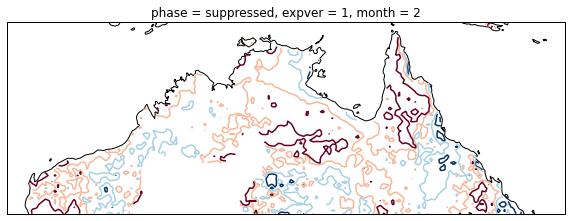

In [65]:
month = 2
phase = 'suppressed'

fig = plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
levels = np.arange(0.75,1.55 , 0.2)
cin_anom.sel(phase = phase, month = month).sel(expver = 1).cin.plot.contour(ax = ax,robust = True, levels = levels,
                                                                            cmap = 'RdBu_r')
ax.coastlines(resolution = '50m')

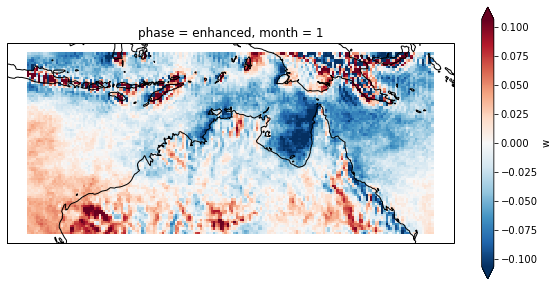

In [69]:
month = 1
phase = 'enhanced'

fig = plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
wwind_raw.sel(phase = phase, month = month).w.plot(ax = ax,robust = True, cmap = 'RdBu_r')
ax.coastlines(resolution = '50m')

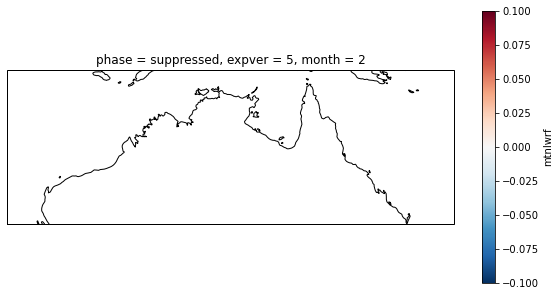

In [79]:
month = 2
phase = 'suppressed'

fig = plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(1,1)
ax = fig.add_subplot(gs[0], projection = ccrs.PlateCarree())
mtnlwrf_anom.sel(phase = phase, month = month).sel(expver = 5).mtnlwrf.plot(ax = ax, robust = True,cmap = 'RdBu_r')
ax.coastlines(resolution = '50m')

## Quiver Plots

In [122]:
savedir = '../images/era5/'

In [36]:
tcw

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 149, time: 7250)
Coordinates:
  * lat      (lat) float64 -10.0 -10.25 -10.5 -11.0 ... -22.5 -22.75 -23.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-30
Data variables:
    tcw      (time, lat, lon) float32 nan nan nan ... 21.650633 22.054811

In [39]:
uwind_raw

<xarray.Dataset>
Dimensions:  (lat: 81, lon: 201, month: 6, nino: 2, phase: 4)
Coordinates:
  * lat      (lat) float32 -25.0 -24.75 -24.5 -24.25 ... -5.75 -5.5 -5.25 -5.0
  * lon      (lon) float32 110.0 110.25 110.5 110.75 ... 159.5 159.75 160.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * nino     (nino) object 'el nino' 'la nina'
  * month    (month) int64 1 2 3 10 11 12
Data variables:
    u        (month, nino, phase, lat, lon) float64 -2.461 -2.067 ... 0.1012

tcw_90_windfield_enhanced_suppressed_la has been saved


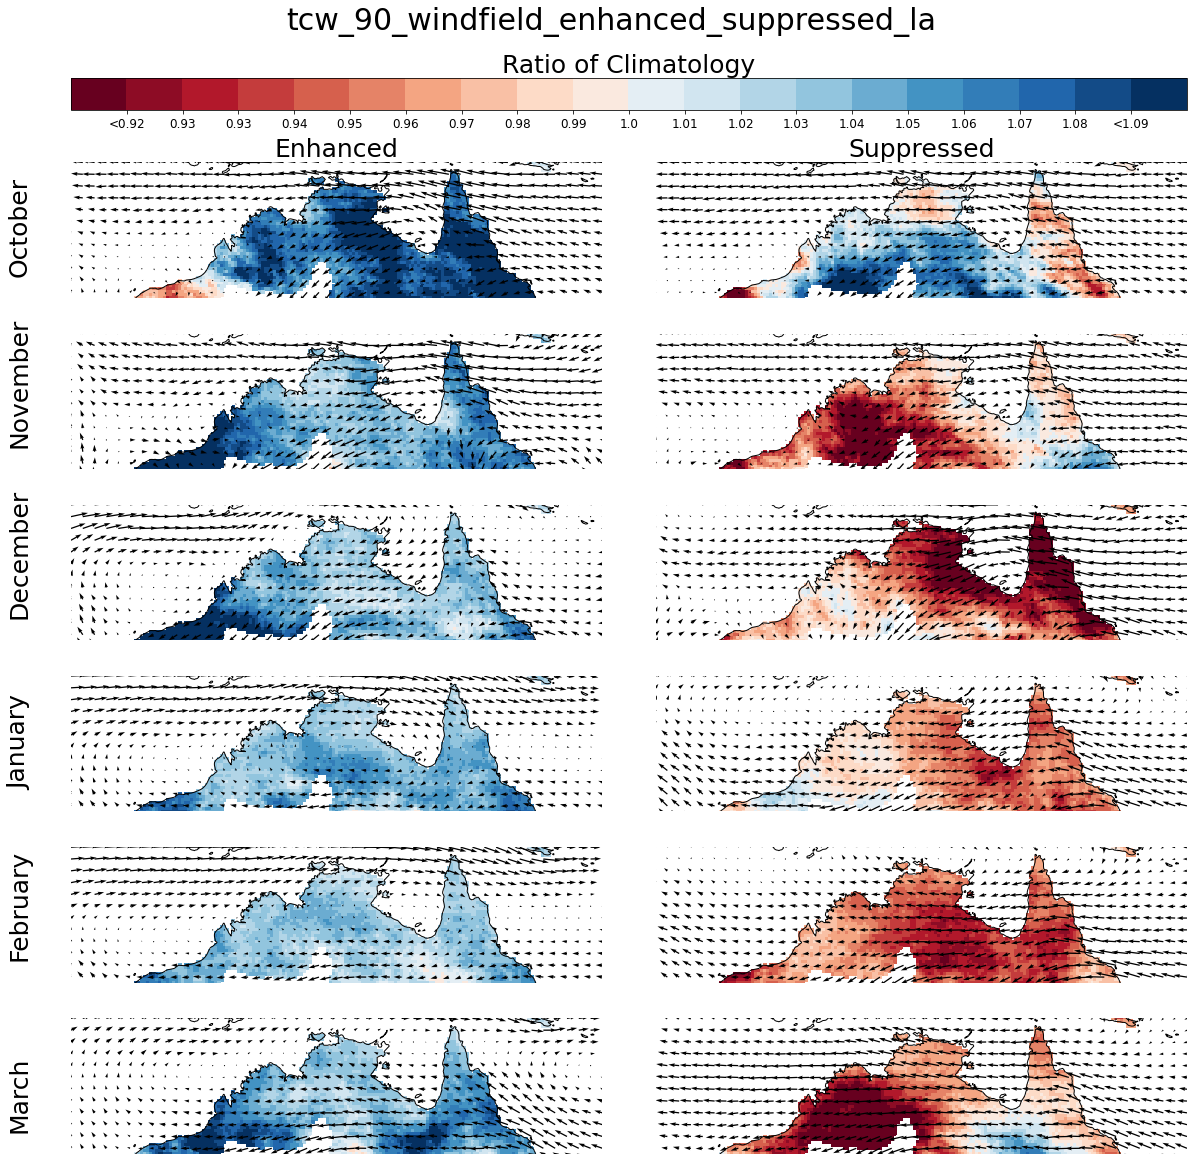

In [67]:
subplot_2 = reload(subplot_2)
# phases = ['enhanced','suppressed','inactive','transition']
phases = ['enhanced','suppressed']
# phases = ['transition','inactive']
# phases = ['all']
nino = 'la nina'
subplot_2.anomalies_plots_sigle_phase_all_month_era5_wind(
                                        tcw_anom.sel(phase = phases).sel(nino = nino).tcw,
                                        uwind_raw.sel(phase = phases).sel(nino = nino), 
                                        vwind_raw.sel(phase = phases).sel(nino = nino),
                                        figsize = (20,20), vmax = 1.1,
                                        cbar_title = 'Ratio of Climatology', 
                                        save_name = f'tcw_90_windfield_{phases[0]}_{phases[1]}_la'
                                                    ,savedir = savedir)

## Plain

p90_tcw_el has been saved


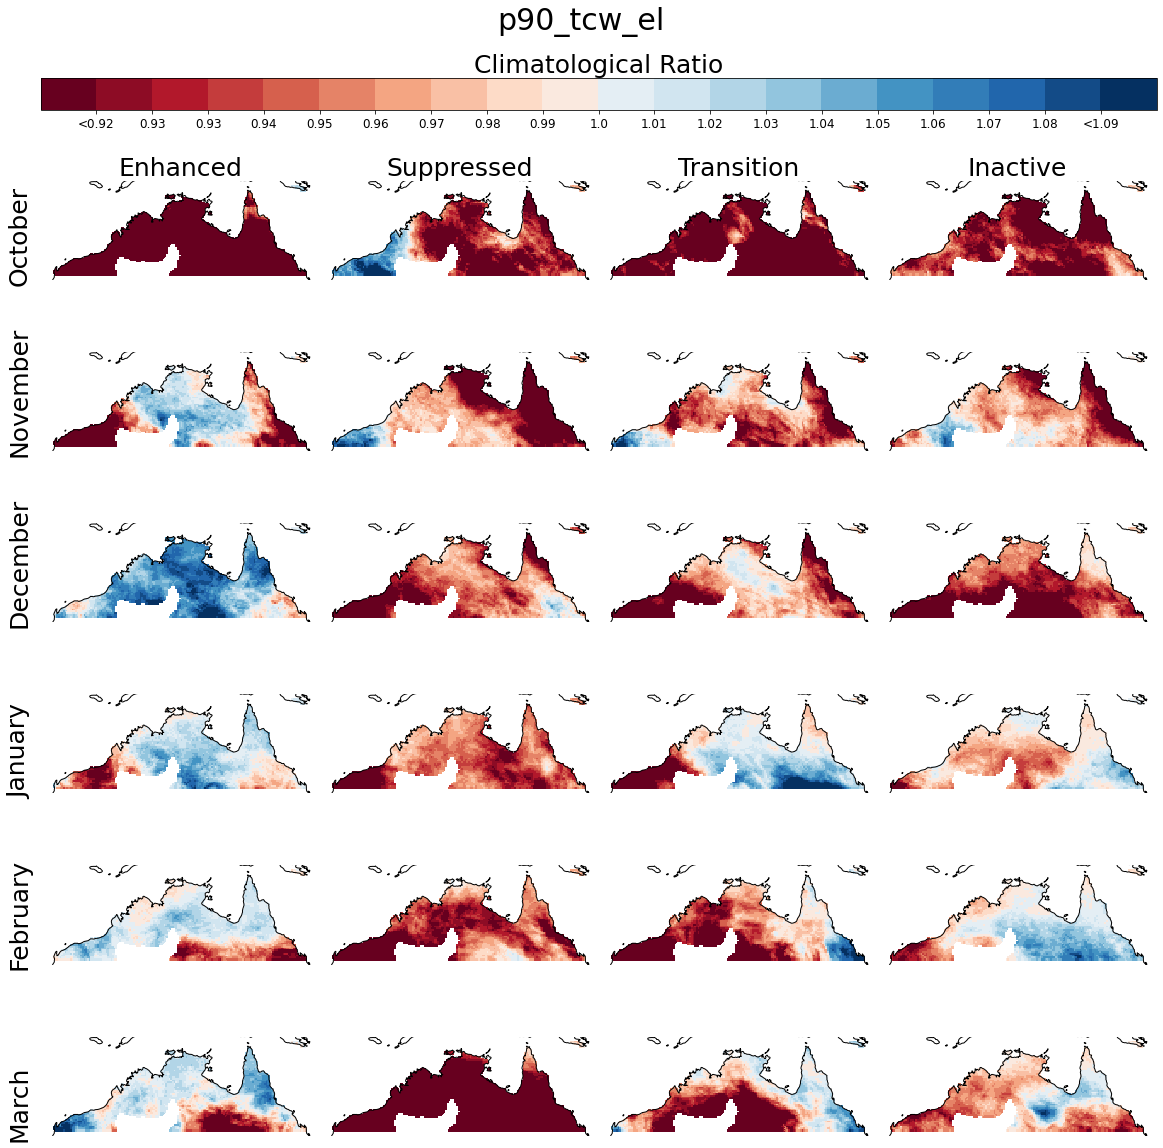

In [21]:
subplot_2 = reload(subplot_2)
subplot_2.anomalies_plots_sigle_phase_all_month_era5(
                                    tcw_anom.sel(phase = ['enhanced','suppressed','transition', 'inactive']).tcw\
                                    .sel(nino = 'el nino'),
                                        figsize = (20,20), vmax = 1.1,
                                        cbar_title = 'Climatological Ratio', save_name = f'p{q}_tcw_el'
                                                    ,savedir = savedir)

## raw

In [22]:
cbar_tcw = 'Total Column Moisture ($kg \;m^{-2}$)'
cbar_cape = 'Convective Available Potential Energy (CAPE)(Joules/kg)'
cbar_cin = 'Convective Inhibition (CIN)(Joules/kg)'
cbar_wwind = 'Vertical Velocity at Surface (m/s)'

p90_tcw_raw_el has been saved


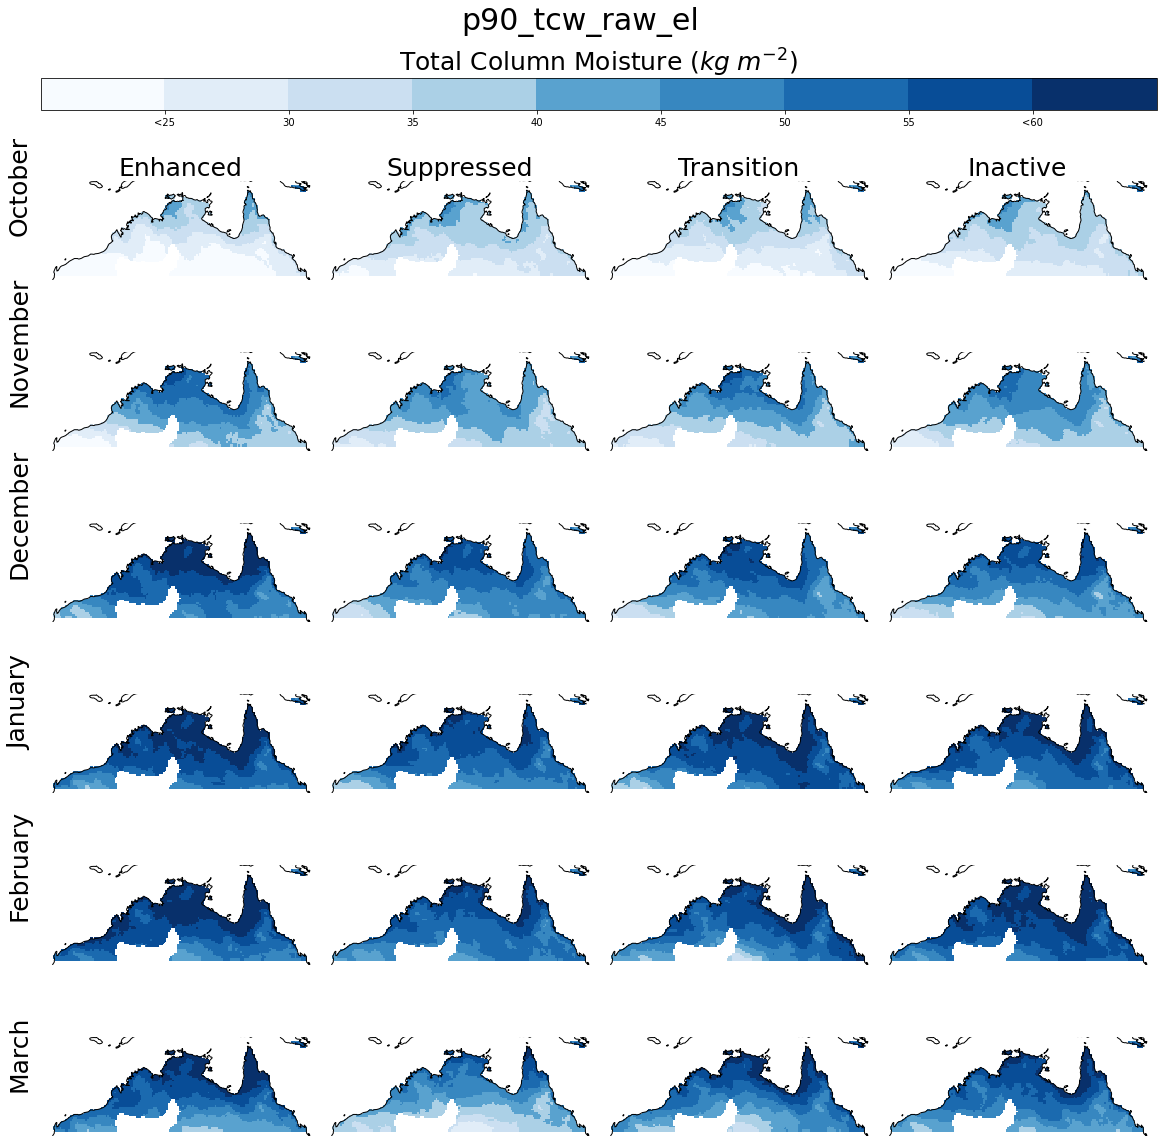

In [31]:
subplot_2 = reload(subplot_2)

subplot_2.raw_values_plots_all_phase_month(
                                tcw_raw.sel(phase = ['enhanced','suppressed','transition', 'inactive']).tcw\
                                                        .sel(nino = 'el nino')
                                                    ,figsize = (20,20),
                                                     step = 5,vmin = 20,vmax = 65,
                                                     cbar_title = cbar_tcw, 
                                                             save_name = f'p{q}_tcw_raw_el'
                                                    ,savedir = savedir)

In [18]:
# don't go beyond here with Run All
assert False

AssertionError: 

# Wheeler and Hendon Phases

## 90th Percentile

In [73]:
phase_calc = reload(phase_calc)
tcw_values, tcw_anomalies =  phase_calc.calculate_1to8_anomalies_for_variables(tcw, 90)

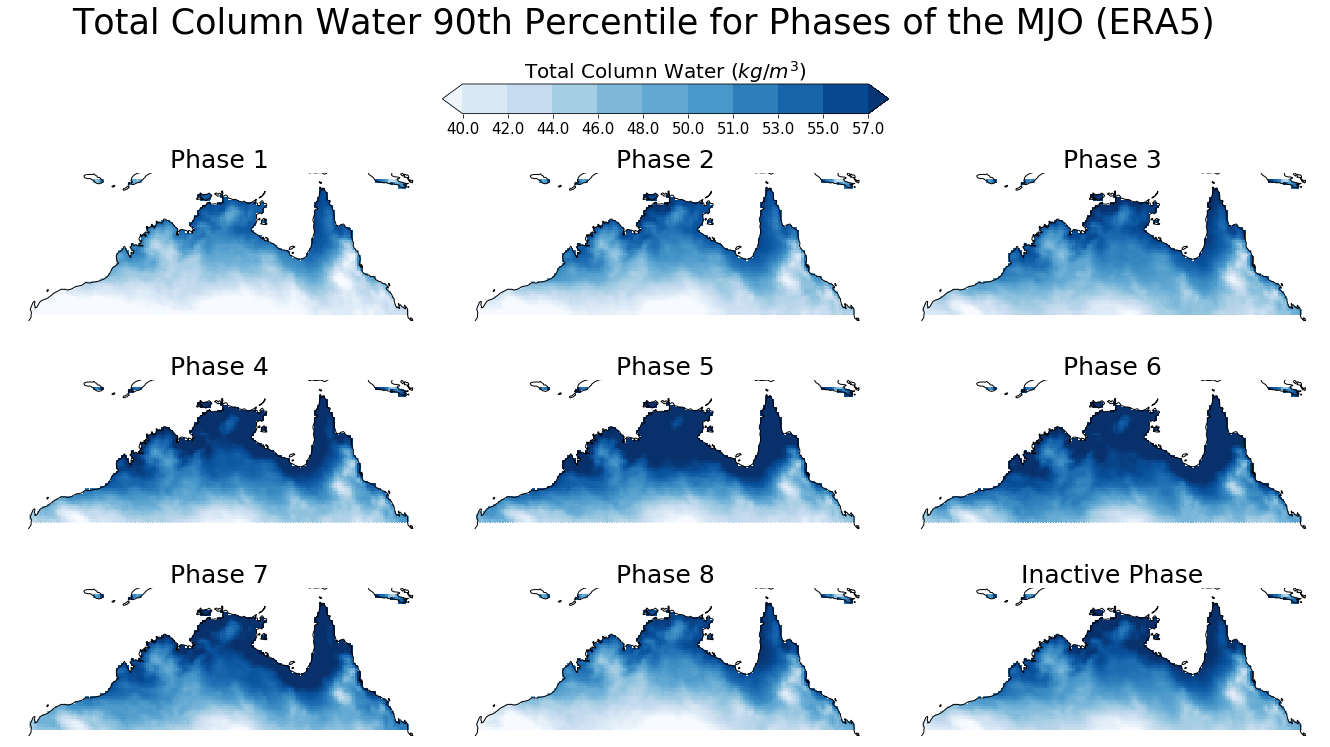

In [74]:
phase_plot.values_plots(tcw_values.tcw, cbar_num_steps = 12,
             title = 'Total Column Water 90th Percentile for Phases of the MJO (ERA5)',
                        cbar_title = r'Total Column Water $(kg/m^3)$',
                       savefig  = 1, savedir = savedir)

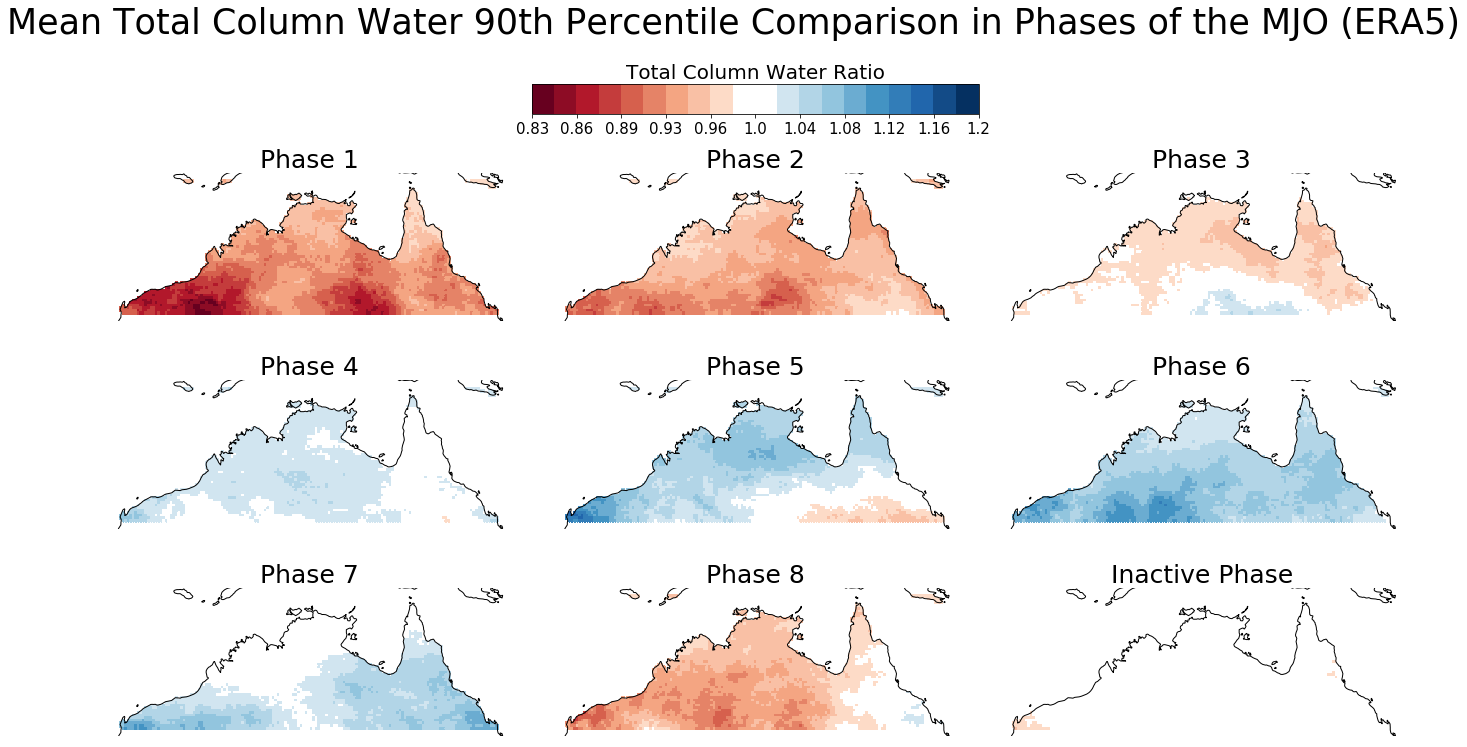

In [75]:
phase_plot = reload(phase_plot)
step = 0.02
end = 1.2
l1 = np.arange(1 + step, end + step, step)

phase_plot.anomalies_plots(tcw_anomalies.tcw,vmax = 1.1, l1 = l1,
                cbar_title = 'Total Column Water Ratio',
                           title = 'Mean Total Column Water 90th Percentile Comparison in Phases of the MJO (ERA5)',
                          savefig  = 1, savedir = savedir)

## 95th Percentile

In [76]:
tcw_values, tcw_anomalies =  phase_calc.calculate_1to8_anomalies_for_variables(tcw, 95)

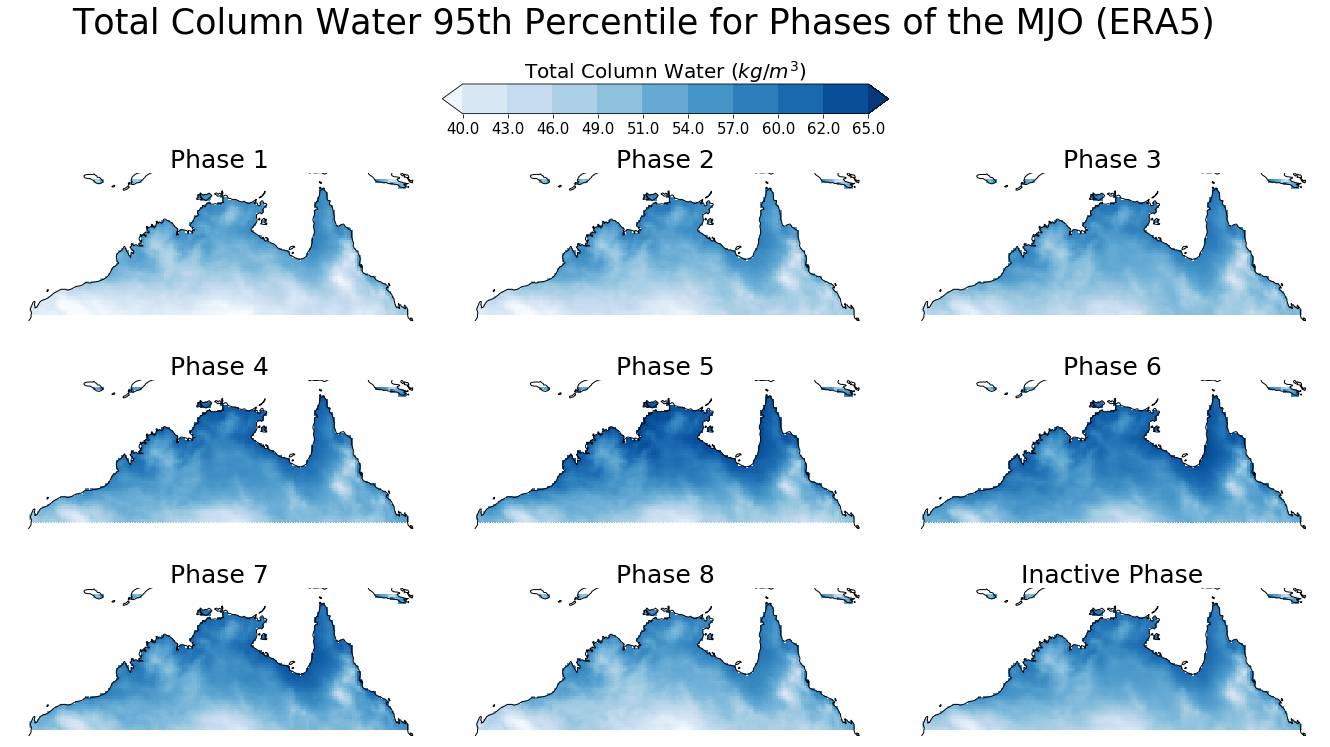

In [77]:
phase_plot.values_plots(tcw_values.tcw, cbar_num_steps = 12,
             title = 'Total Column Water 95th Percentile for Phases of the MJO (ERA5)',
                        cbar_title = r'Total Column Water $(kg/m^3)$',
                       savefig  = 1, savedir = savedir)

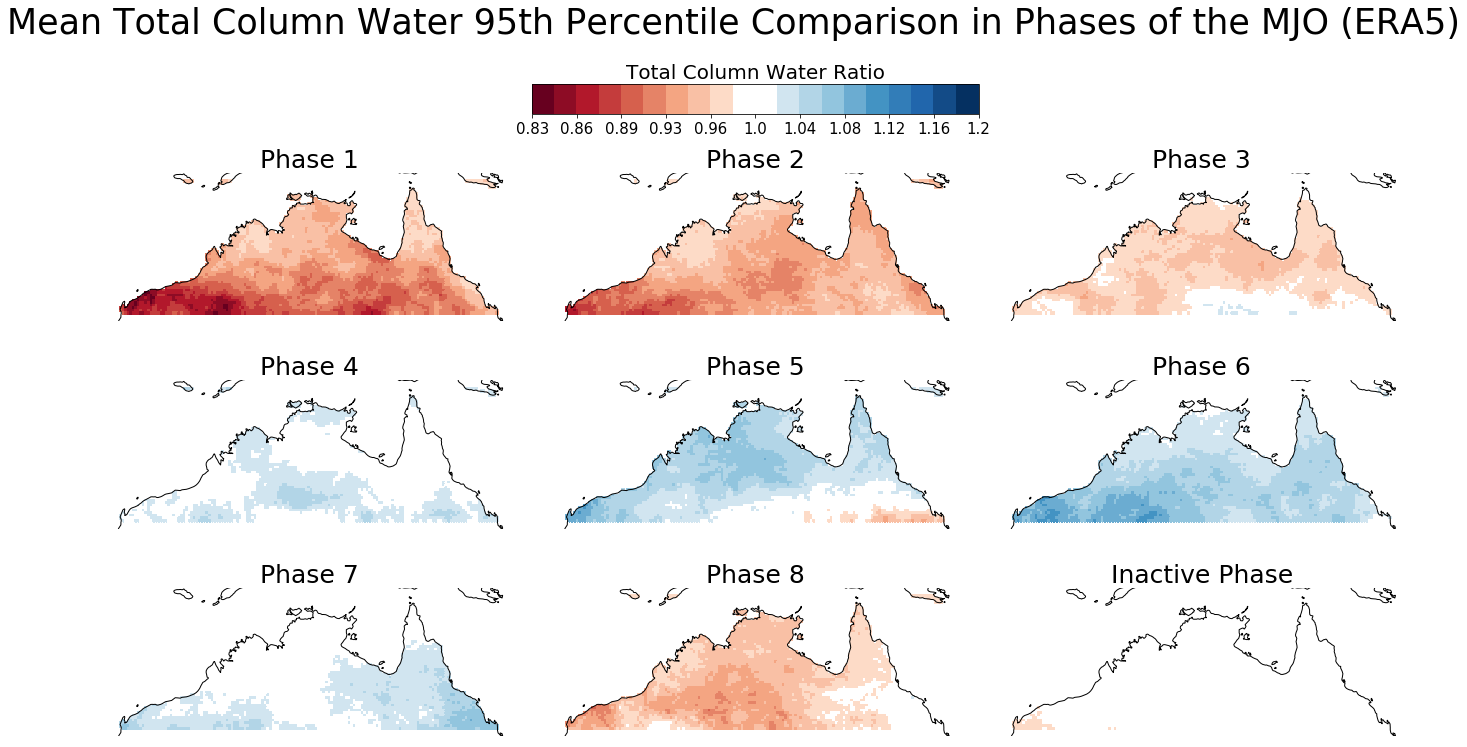

In [78]:
phase_plot = reload(phase_plot)
step = 0.02
end = 1.2
l1 = np.arange(1 + step, end + step, step)

phase_plot.anomalies_plots(tcw_anomalies.tcw,vmax = 1.1, l1 = l1,
                cbar_title = 'Total Column Water Ratio',
                           title = 'Mean Total Column Water 95th Percentile Comparison in Phases of the MJO (ERA5)',
                          savefig  = 1, savedir = savedir)